In [1]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [36]:
test_data = pd.read_csv('test_data.csv')
reference_ssid_empty = pd.read_csv('reliable_data_mst_powerful_per_mac_with_empty.csv')
reference_ssid_no_empty = pd.read_csv('reliable_data_mst_powerful_per_mac_no_empty.csv')

In [37]:
mesures_list = test_data[['datetime']].to_numpy().T[0]
mesures_list = pd.unique(mesures_list)
mesures_list[92]

'Mon Apr 05 15:08:29 GMT+03:00 2021'

In [67]:
sample = test_data.where(test_data['floor'] == 0).dropna().head(1)
#print(sample)
def single_test(sample, reference_table = reference_ssid_empty, data_set = test_data, output_type='lite'):
    my_mac_list = sample[['mac']].to_numpy().T[0]
    result = pd.DataFrame([],columns=reference_table.columns)
    for mac in my_mac_list:
        if(not reference_table.where(reference_table['mac'] == mac).dropna().empty):
            result = reference_table.where(reference_table['mac'] == mac)
            break
    if (output_type == 'lite'):
        sample = sample.head(1).to_numpy()[0]
        if(result.empty):
            result = [0,0,-1,-1]
        else:
            result = result.dropna().head(1).to_numpy()[0]
        return sample[6], sample[7], result[2], result[3]
    else:
        return sample['mac'], sample['zone'].head(1), sample['floor'].head(1), result.dropna()
single_test(sample, output_type='lit')

(2692    58:ac:78:77:8e:80
 Name: mac, dtype: object,
 2692    11.0
 Name: zone, dtype: float64,
 2692    0.0
 Name: floor, dtype: float64,
      Unnamed: 0                mac  zone  floor  strength           ssid
 304       576.0  58:ac:78:77:8e:80  11.0    2.0     -63.0  bmstu_student)

In [29]:
reference_ssid_empty.where(reference_ssid_empty['mac'] == sample[['mac']].to_numpy().T[0][1]).dropna().empty

False

In [5]:
test_data.nunique()

Unnamed: 0    2729
n             2729
id            2729
mac            594
strength        53
ssid           311
zone            16
floor            6
datetime       152
dtype: int64

In [54]:
test_data.where(test_data['datetime'] == mesures_list[0]).dropna()

,Unnamed: 0,n,id,mac,strength,ssid,zone,floor,datetime
0,494.0,495.0,537.0,00:26:52:d8:7e:e1,-69.0,bmstu_staff,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021
1,495.0,496.0,538.0,d4:ca:6d:0c:2f:ba,-71.0,nii_isu_dep1,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021
2,496.0,497.0,539.0,20:cf:30:ce:5d:43,-77.0,IU1-603,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021
3,497.0,498.0,540.0,e4:8d:8c:52:83:15,-78.0,shtucer,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021
4,498.0,499.0,541.0,06:d6:aa:29:ed:a6,-79.0,AndroidAP,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021
5,499.0,500.0,542.0,38:2c:4a:a2:e3:e0,-80.0,Kafedra SM10,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021
6,500.0,501.0,543.0,00:26:52:d8:7e:e9,-83.0,bmstu_guest,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021
7,501.0,502.0,544.0,00:26:52:d8:7e:e0,-84.0,bmstu_lb,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021
8,502.0,503.0,545.0,50:17:ff:df:58:61,-85.0,bmstu_staff,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021
9,503.0,504.0,546.0,00:26:52:d8:74:91,-87.0,bmstu_staff,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021


In [11]:
test_data.where(test_data['mac'] == '00:26:52:d8:7e:e1').dropna()

,Unnamed: 0,n,id,mac,strength,ssid,zone,floor,datetime
0,494.0,495.0,537.0,00:26:52:d8:7e:e1,-69.0,bmstu_staff,11.0,5.0,Mon Apr 05 14:37:01 GMT+03:00 2021
21,515.0,516.0,558.0,00:26:52:d8:7e:e1,-78.0,bmstu_staff,11.0,5.0,Mon Apr 05 14:37:14 GMT+03:00 2021
42,537.0,538.0,580.0,00:26:52:d8:7e:e1,-77.0,bmstu_staff,11.0,5.0,Mon Apr 05 14:37:35 GMT+03:00 2021


In [27]:
test_data = test_data.where(test_data['zone'] > 1).mask(test_data['zone'] == 7).mask(test_data['zone'] == 8).dropna()
test_data.shape

(2496, 9)

total 152 zones recognised 114 75.0 floores_recognised 117 76.97368421052632
zones_tested [ 2  4  7 10  8  6 12 11  1 10 18 22  6 10 16  9]
zones_unguessed [0 0 3 6 2 3 5 4 1 4 1 2 2 1 2 2]
floores_tested [ 4  4 64 37 28 15  0  0  0  0  0]
floores_unguessed [ 4  4  7 10  6  4  0  0  0  0  0]


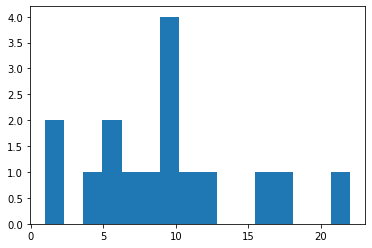

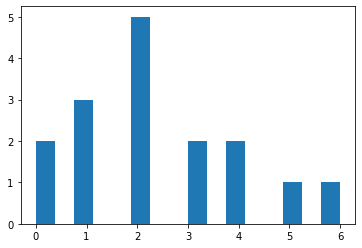

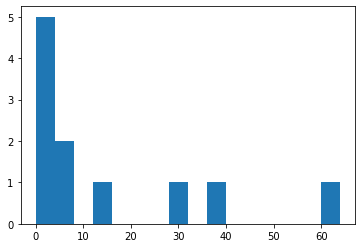

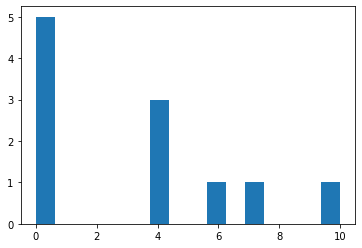

In [70]:
#check full test data
i = 0 #total samples checked
fl_correct = 0 # total floores recognised correcty
z_correct = 0  # total zones recognised correcty
zones_tested = np.zeros((16,), dtype=int)
zones_unguessed = np.zeros((16,), dtype=int)
floores_tested = np.zeros((11,), dtype=int)
floores_unguessed = np.zeros((11,), dtype=int)

for mesure in mesures_list:
    i = i+1
    ftd_sample = test_data.where(test_data['datetime'] == mesure).dropna()
    test_result = np.int_(single_test(ftd_sample, reference_table=reference_ssid_no_empty))
    #print(i, test_result)
    zones_tested[test_result[0]]=zones_tested[test_result[0]]+1
    floores_tested[test_result[1]]=floores_tested[test_result[1]]+1
    if(test_result[0]==test_result[2]):
        z_correct = z_correct+1
    else:
        zones_unguessed[test_result[0]]=zones_unguessed[test_result[0]]+1
    
    if(test_result[1]==test_result[3]):
        fl_correct = fl_correct+1
    else:
        floores_unguessed[test_result[1]]=floores_unguessed[test_result[1]]+1
print('total', i, 'zones recognised', z_correct,  z_correct/i*100, 'floores_recognised', fl_correct, fl_correct/i*100)
print('zones_tested',zones_tested)
print('zones_unguessed',zones_unguessed)
print('floores_tested',floores_tested)
print('floores_unguessed',floores_unguessed)
data_for_hist = []
#data_new_2['mac', 'strength']
#data_for_hist.append(data_new_2.columns[3])
data_for_hist.append(zones_tested)
data_for_hist.append(zones_unguessed)
data_for_hist.append(floores_tested)
data_for_hist.append(floores_unguessed)
for col in data_for_hist:
    plt.hist(col, 16)
    #plt.xlabel(col)
    plt.show()

In [ ]:
def single_test2(sample, reference_table = reference_ssid_empty, data_set = test_data, output_type='lite'):
    my_mac_list = sample[['mac']].to_numpy().T[0]
    result = pd.DataFrame([],columns=reference_table.columns)
    for mac in my_mac_list:
        if(not reference_table.where(reference_table['mac'] == mac).dropna().empty):
            result = reference_table.where(reference_table['mac'] == mac)
            break
    if (output_type == 'lite'):
        sample = sample.head(1).to_numpy()[0]
        if(result.empty):
            result = [0,0,-1,-1]
        else:
            result = result.dropna().head(1).to_numpy()[0]
        return sample[6], sample[7], result[2], result[3]
    else:
        return sample['mac'], sample['zone'].head(1), sample['floor'].head(1), result.dropna()
single_test(sample, output_type='lite')